## Setup

In [1]:
import os
import numpy as np
import time
import cv2
from __future__ import print_function

## Loop

In [20]:
cap = cv2.VideoCapture('/media/data/Dropbox/Git/vid-viz/data/test.mp4')
#cap = cv2.VideoCapture(0)

if(cap.isOpened()):
    print('cap opened')
else:
    print('cap not opened')
    cap.open(0)
    
while(True): #cap.isOpened()):
    ret, frame = cap.read()

    print("ad")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #cv2.imshow('frame',gray)
  #  if cv2.waitKey(1) & 0xFF == ord('q'):
   #     break

cap.release()
# cv2.destroyAllWindows()

cap not opened
ad


error: /io/opencv/modules/imgproc/src/color.cpp:9748: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [40]:
whos

Variable         Type                   Data/Info
-------------------------------------------------
FFMPEG_BIN       str                    ffmpeg
cap              VideoCapture           <VideoCapture 0x7f3b9d0305f0>
command          list                   n=10
cv2              module                 <module 'cv2.cv2' from '/<...>ist-packages/cv2/cv2.so'>
filename         str                    /media/data/Dropbox/Git/vid-viz/data/test.mp4
frame            NoneType               None
get_video_size   function               <function get_video_size at 0x7f3ba541c5f0>
image            ndarray                360x420x3: 453600 elems, type `uint8`, 453600 bytes (442 kb)
infos            str                    ffmpeg version 2.8.11-0ub<...> such file or directory\n
np               module                 <module 'numpy' from '/us<...>ages/numpy/__init__.pyc'>
os               module                 <module 'os' from '/usr/lib/python2.7/os.pyc'>
pipe             Popen                  <subpro

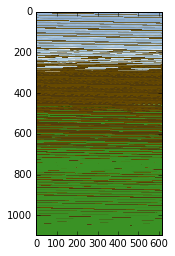

In [46]:
import subprocess as sp
import matplotlib.pyplot as plt
%matplotlib inline

FFMPEG_BIN = 'ffmpeg'

filename = '/media/data/Dropbox/Git/vid-viz/data/test.mp4'

command = [ FFMPEG_BIN,
            '-i', filename,
            '-f', 'image2pipe',
            '-pix_fmt', 'rgb24',
            '-vcodec', 'rawvideo', '-']
pipe = sp.Popen(command, stdout=sp.PIPE, bufsize=10**8)

# read 1 frame
sz = get_video_size(filename)
raw_image = pipe.stdout.read(sz[0]*sz[1]*3)

# transform the byte read into a numpy array
image =  np.fromstring(raw_image, dtype='uint8')
image = image.reshape((sz[0],sz[1],3))

# throw away the data in the pipe's buffer.
pipe.stdout.flush()

plt.imshow(image)

pipe.terminate()

In [38]:
# http://stackoverflow.com/questions/7362130/getting-video-dimension-from-ffmpeg-i

def get_video_size(video_filename):
    
    """Returns width, height of video using ffprobe"""
    # Video duration and hence start time
    proc = sp.Popen(['ffprobe', video_filename],
        stdout=sp.PIPE, stderr=sp.STDOUT)
    res = proc.communicate()[0]

    # Check if ffprobe failed, probably on a bad file
    if 'Invalid data found when processing input' in res:
        raise ValueError("Invalid data found by ffprobe in %s" % video_filename)

    # Find the video stream
    width_height_l = []
    for line in res.split("\n"):
        # Skip lines that aren't stream info
        if not line.strip().startswith("Stream #"):
            continue

        # Check that this is a video stream
        comma_split = line.split(',')
        if " Video: " not in comma_split[0]:
            continue

        # The third group should contain the size and aspect ratio
        if len(comma_split) < 3:
            raise ValueError("malform video stream string:", line)

        # The third group should contain the size and aspect, separated
        # by spaces
        size_and_aspect = comma_split[2].split()        
        if len(size_and_aspect) == 0:
            raise ValueError("malformed size/aspect:", comma_split[2])
        size_string = size_and_aspect[0]

        # The size should be two numbers separated by x
        width_height = size_string.split('x')
        if len(width_height) != 2:
            raise ValueError("malformed size string:", size_string)

        # Cast to int
        width_height_l.append(map(int, width_height))

#     if len(width_height_l) > 1:
#         print "warning: multiple video streams found, returning first"
        
    return width_height_l[0]